In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
#get torchinfo

try:
  from torchinfo import summary

except:
  print(f"could not find torch info! downloading")
  !pip install -q torchinfo
  from torchinfo import summary

try:
  from go_modular import data_setup, engine

except:
  print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
  !git clone https://github.com/ayda76/DeepLearningPytorch
  !mv DeepLearningPytorch/Foodproject/go_modular .
  !rm -rf DeepLearningPytorch
  from go_modular import data_setup, engine



could not find torch info! downloading
[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'DeepLearningPytorch'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 436 (delta 44), reused 59 (delta 12), pack-reused 313
Receiving objects: 100% (436/436), 124.61 MiB | 41.59 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [3]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
import os
import zipfile
import requests

from pathlib import Path

data_path=Path("data/")
image_path= data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} already exists")

else:
  print(f"{image_path} does not exist! creating...")
  image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path / "pizza_steak_sushi.zip","wb") as f:
    request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("unzipping")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)


  os.remove(data_path/ "pizza_steak_sushi.zip")


data/pizza_steak_sushi does not exist! creating...
unzipping
Unzipping pizza, steak, sushi data...


In [5]:
train_dir=image_path/ "train"
test_dir=image_path/ "test"
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [6]:
normalize=transforms.Normalize(mean=[0.485,0.456,0.406],
                               std=[0.229,0.224,0.225])

manual_transform=transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     normalize])


In [7]:
from go_modular import data_setup, engine
train_dataloader,test_dataloader,class_names=data_setup.create_dataloaders(train_dir=train_dir,
                                                                           test_dir=test_dir,
                                                                           transform=manual_transform,
                                                                           batch_size=32)
train_dataloader,test_dataloader,class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f51c2c230a0>,
 ['pizza', 'steak', 'sushi'])

In [8]:
weights=torchvision.models.EfficientNet_B1_Weights.DEFAULT
weights

EfficientNet_B1_Weights.IMAGENET1K_V2

In [9]:
auto_transforms=weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[240]
    resize_size=[255]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [10]:
train_dataloader,test_dataloader,class_names=data_setup.create_dataloaders(train_dir=train_dir,
                                                                           test_dir=test_dir,
                                                                           transform=auto_transforms,
                                                                           batch_size=32)

In [11]:
train_dataloader,test_dataloader,class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f51c2b6a3b0>,
 ['pizza', 'steak', 'sushi'])

In [12]:
model=torchvision.models.efficientnet_b1(weights=weights).to(device)
model

Downloading: "https://download.pytorch.org/models/efficientnet_b1-c27df63c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1-c27df63c.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 68.2MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [13]:
model.features

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), 

In [14]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [15]:
#freeze the base model
for param in model.features.parameters():
  param.requires_grad=False

In [16]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model.classifier=nn.Sequential(
    nn.Dropout(p=0.2,inplace=True),
    nn.Linear(in_features=1280, out_features=len(class_names))
).to(device)
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

In [17]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [18]:
from go_modular import data_setup, engine
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

start_time=timer()

results=engine.train(model=model,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=5,
                     device=device)
end_time=timer()

print(f"total training time: {end_time - start_time: .3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0749 | train_acc: 0.4844 | test_loss: 0.9884 | test_acc: 0.6932
Epoch: 2 | train_loss: 0.9554 | train_acc: 0.7344 | test_loss: 0.9174 | test_acc: 0.8769
Epoch: 3 | train_loss: 0.8705 | train_acc: 0.7734 | test_loss: 0.8408 | test_acc: 0.8968
Epoch: 4 | train_loss: 0.7786 | train_acc: 0.9453 | test_loss: 0.7699 | test_acc: 0.9176
Epoch: 5 | train_loss: 0.7477 | train_acc: 0.8203 | test_loss: 0.7433 | test_acc: 0.8968
total training time:  24.675 seconds


In [19]:
#plot loss curves
try:
  from helper_functions import plot_loss_curves
except:
  print("could not find! downloading")
  with open("helper_functions.py","wb") as f:
    import requests

    request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/helper_functions.py")
    f.write(request.content)
  from helper_functions import plot_loss_curves






could not find! downloading


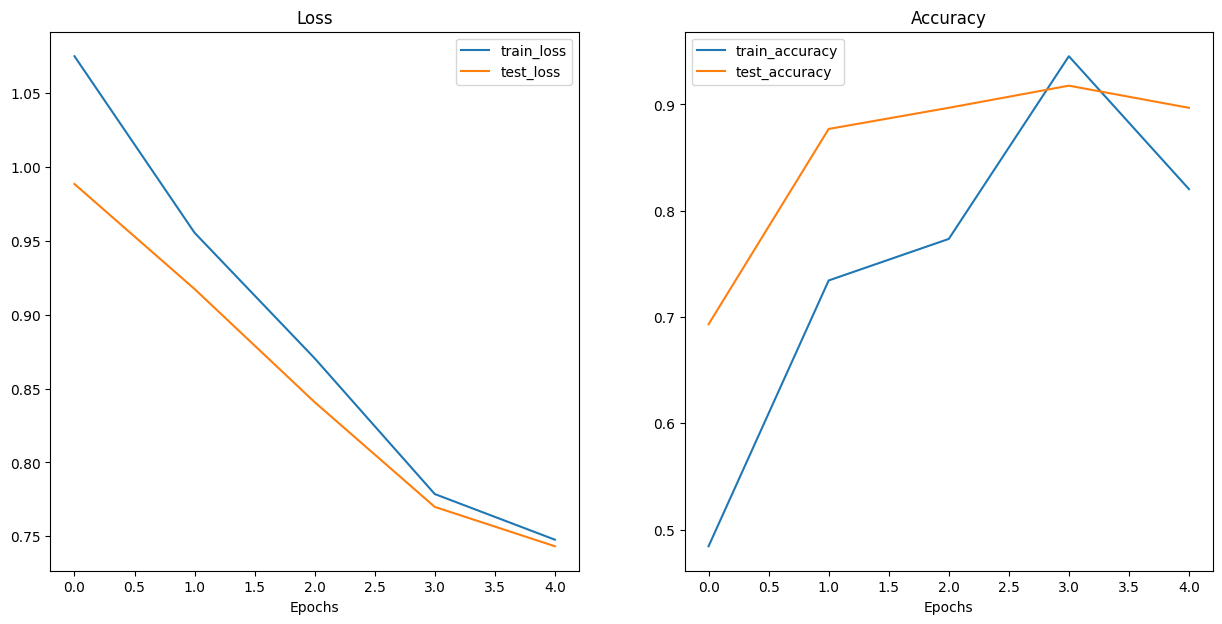

In [20]:
plot_loss_curves(results)

In [21]:
#predictions
from typing import List, Tuple
from PIL import Image
from torchvision import transforms
def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:List[str],
                        image_size:Tuple[int,int]=(224,224),
                        transform:torchvision.transforms=None,
                        device:torch.device=device):
  img=Image.open(image_path)
  if transform is not None:
    image_transform =transform

  else:
    image_transform=transforms.Compose([transforms.Resize(image_size),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485,0.456,0.406],
                                                              std=[0.229,0.224,0.225])])
    model.to(device)

    model.eval()
    with torch.inference_mode():
      transformed_image=image_transform(img).unsqueeze(dim=0)
      target_image_pred=model(transformed_image.to(device))

    target_image_pred_probs=torch.softmax(target_image_pred,dim=1)
    target_image_pred_label=torch.argmax(target_image_pred_probs, dim=1)

    plt.figure()
    plt.imshow(img)
    plt.title(f"pred:{class_names[target_image_pred_label]} | probibility:{target_image_pred_probs.max():.3f}")
    plt.axis(False)


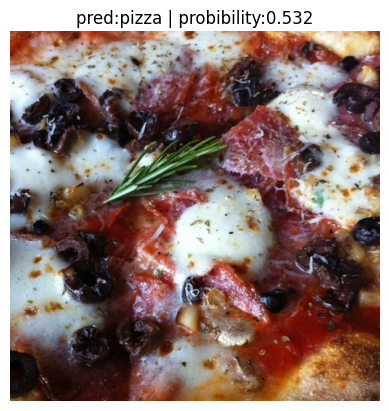

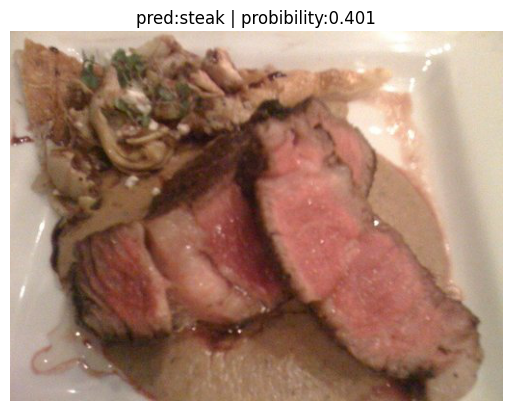

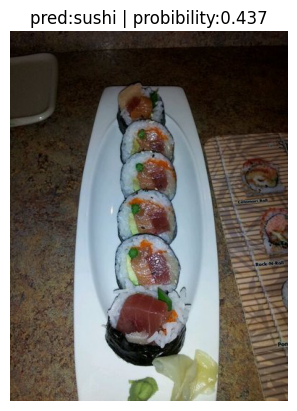

In [24]:
import random
num_image_to_plot=3
test_image_path_list=list(Path(test_dir).glob("*/*.jpg"))
test_image_path_sample=random.sample(population=test_image_path_list, k=num_image_to_plot)
for image_path in test_image_path_sample:
  pred_and_plot_image(model=model,
                      image_path=image_path,
                      class_names=class_names,
                      image_size=(224,224))

